In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 12, 20)
stock = ['INFY']
data = pdr.DataReader(stock, 'stooq', str(start.date()), str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-24,INFY,21.86,22.11,21.83,21.87,7859074.0
2024-07-23,INFY,22.08,22.10,21.73,21.86,9992282.0
2024-07-22,INFY,21.79,21.79,21.46,21.68,8459653.0
2024-07-19,INFY,21.68,21.87,21.31,21.31,16443577.0
2024-07-18,INFY,22.25,22.61,21.52,21.66,42176088.0


In [2]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-24,INFY,21.86,22.11,21.83,21.87,7859074.0
1,2024-07-23,INFY,22.08,22.10,21.73,21.86,9992282.0
2,2024-07-22,INFY,21.79,21.79,21.46,21.68,8459653.0
3,2024-07-19,INFY,21.68,21.87,21.31,21.31,16443577.0
4,2024-07-18,INFY,22.25,22.61,21.52,21.66,42176088.0


In [3]:
newData.to_csv('Infosys_stock_2018_to_2024.csv')

<Axes: title={'center': 'Infosys Stock Price'}, xlabel='Date', ylabel='Close Price'>

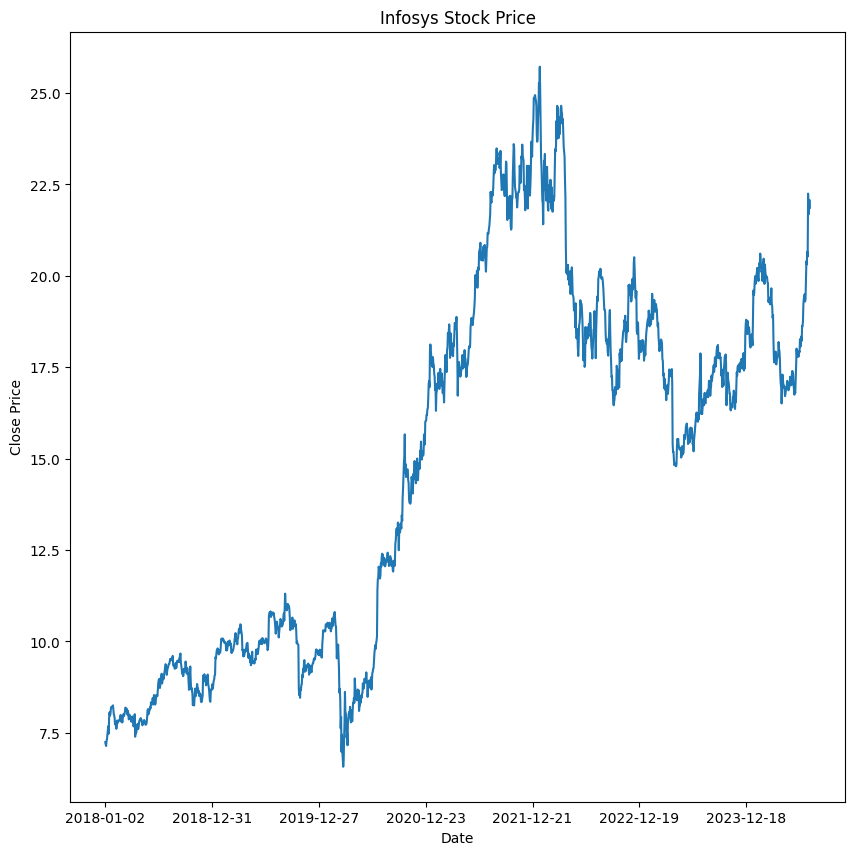

In [4]:
import matplotlib.pyplot as plt
infy_data = pd.read_csv('Infosys_stock_2018_to_2024.csv')
infy_data.head()

infy_data.set_index('Date', inplace=True)
infy_data.sort_index(inplace=True)
infy_data.head()

close_price = infy_data['Close']
close_price.head()

close_price.plot(xlabel='Date', ylabel='Close Price',label='TSLA', title='Infosys Stock Price', figsize=(10, 10))

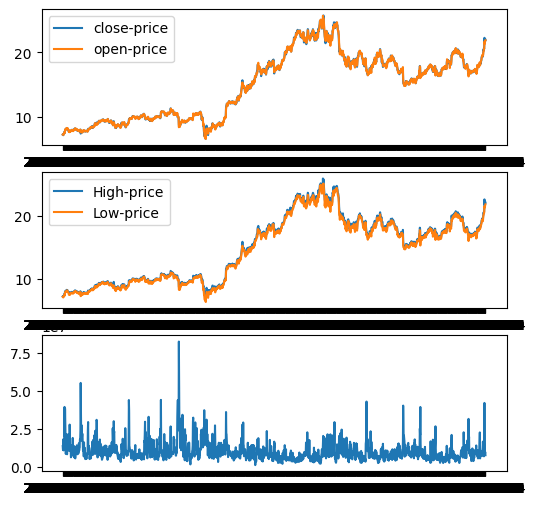

In [5]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(infy_data['Close'],label='close-price')
plt.plot(infy_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(infy_data['High'],label='High-price')
plt.plot(infy_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(infy_data['Volume'],label='Volumne')

In [6]:
# moving average

infy_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1649,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07
2018-01-03,1648,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07
2018-01-04,1647,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07
2018-01-05,1646,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07
2018-01-08,1645,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07


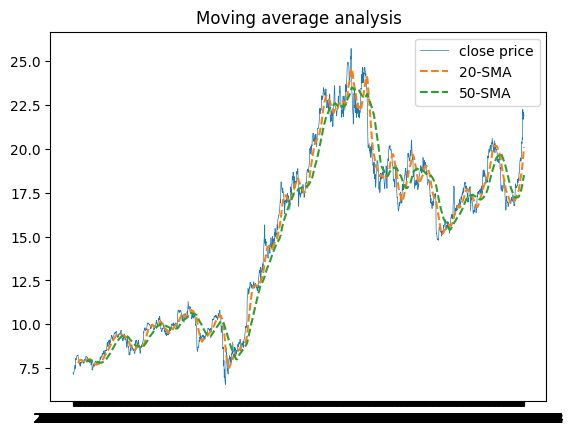

In [7]:
# calulate the moving average
infy_data['SMA_20'] = infy_data['Close'].rolling(20).mean()
infy_data['SMA_50'] = infy_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(infy_data['Close'],label='close price',linewidth=0.5)
plt.plot(infy_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(infy_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

In [8]:
! pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8c0c4d786133e0b7206baae0490c2a8cee0acdfbdb015f29e9e7771f2b43a03d
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


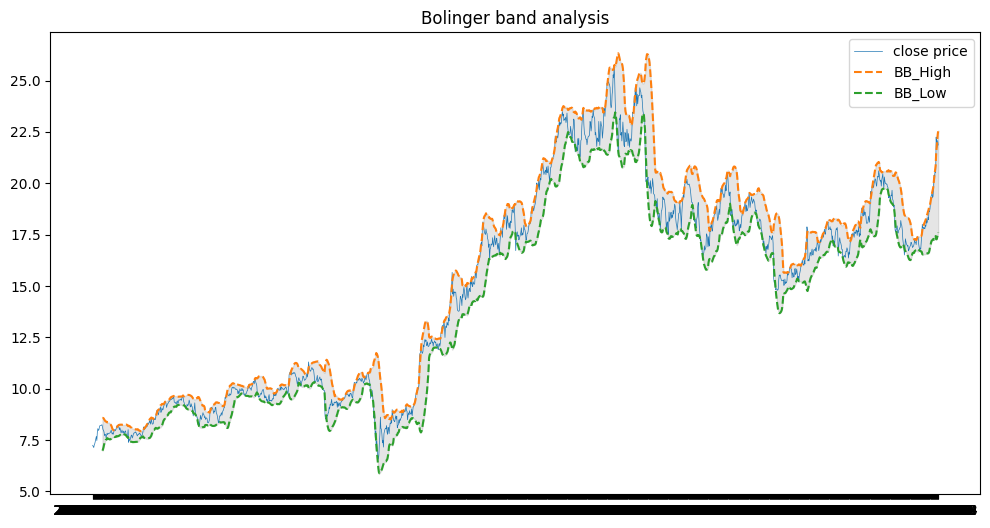

In [9]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(infy_data['Close'],window=20,window_dev=2)

infy_data['BB_High']=bb.bollinger_hband()
infy_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(infy_data['Close'],label='close price',linewidth=0.5)
plt.plot(infy_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(infy_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(infy_data.index,infy_data['BB_High'],
                 infy_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-18,4,INFY,22.25,22.61,21.52,21.66,42176088.0,19.3640,18.1212,21.455310,17.272690,86.850808
2024-07-19,3,INFY,21.68,21.87,21.31,21.31,16443577.0,19.5345,18.2122,21.790758,17.278242,76.154787
2024-07-22,2,INFY,21.79,21.79,21.46,21.68,8459653.0,19.7210,18.3062,22.073487,17.368513,76.749868
2024-07-23,1,INFY,22.08,22.10,21.73,21.86,9992282.0,19.9180,18.4084,22.365861,17.470139,78.288236
2024-07-24,0,INFY,21.86,22.11,21.83,21.87,7859074.0,20.0940,18.5082,22.568748,17.619252,74.273315


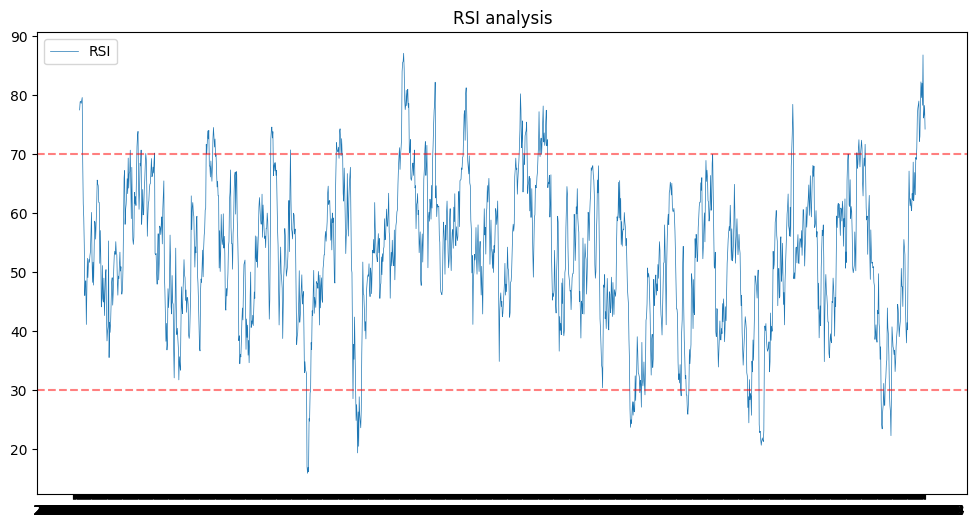

In [10]:
# relative strength index
infy_data['RSI'] = ta.momentum.rsi(infy_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(infy_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
infy_data.tail()

In [11]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 12, 20)

stock = ['IBN']
data = pdr.DataReader(stock, 'stooq', str(start.date()), str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-24,IBN,28.62,28.950,28.570,28.94,8535547.0
2024-07-23,IBN,29.11,29.285,28.940,29.05,3815082.0
2024-07-22,IBN,29.36,29.570,29.220,29.55,3183272.0
2024-07-19,IBN,29.35,29.610,29.345,29.36,4027158.0
2024-07-18,IBN,29.46,29.550,29.400,29.41,5150982.0


In [12]:
newData = data.reset_index()

In [13]:
newData.to_csv('ICICI_stock_2018_to_2024.csv')

<Axes: title={'center': 'ICICI Stock Price'}, xlabel='Date', ylabel='Close Price'>

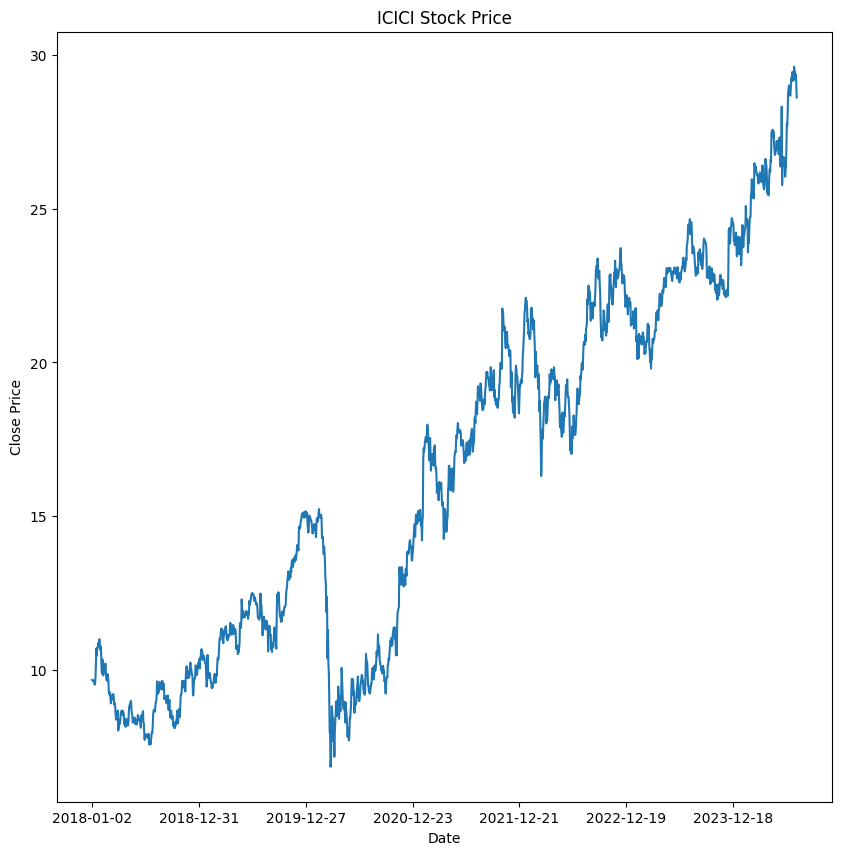

In [14]:
import matplotlib.pyplot as plt

ICICI_data = pd.read_csv('ICICI_stock_2018_to_2024.csv')
ICICI_data.head()

ICICI_data.set_index('Date', inplace=True)

ICICI_data.sort_index(inplace=True)
ICICI_data.head()

close_price = ICICI_data['Close']
close_price.head()

close_price.plot(xlabel='Date', ylabel='Close Price',label='TSLA', title='ICICI Stock Price', figsize=(10, 10))

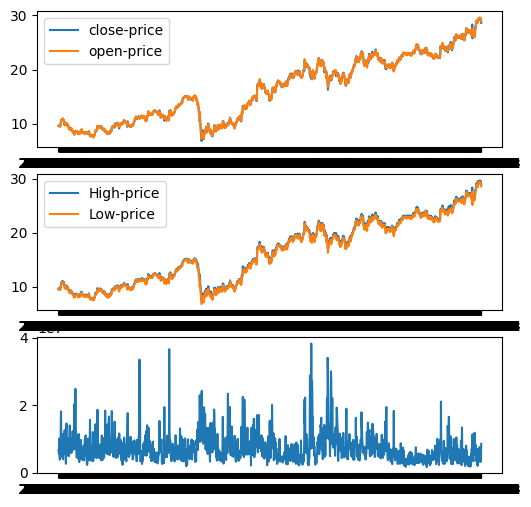

In [15]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(ICICI_data['Close'],label='close-price')
plt.plot(ICICI_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(ICICI_data['High'],label='High-price')
plt.plot(ICICI_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(ICICI_data['Volume'],label='Volumne')

In [16]:
# moving average

ICICI_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1649,IBN,9.67081,9.68075,9.50469,9.58228,6.635720e+06
2018-01-03,1648,IBN,9.65091,9.70065,9.63201,9.68075,6.277079e+06
2018-01-04,1647,IBN,9.62207,9.71060,9.60217,9.67081,5.625544e+06
2018-01-05,1646,IBN,9.64196,9.65091,9.50469,9.62207,1.010170e+07
2018-01-08,1645,IBN,9.65091,9.66086,9.57332,9.65091,5.311405e+06


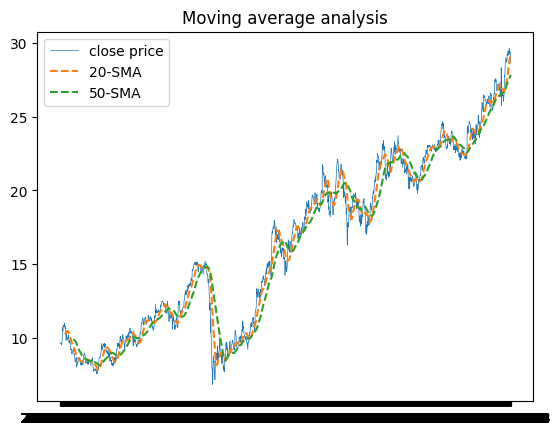

In [17]:
# calulate the moving average
ICICI_data['SMA_20'] = ICICI_data['Close'].rolling(20).mean()
ICICI_data['SMA_50'] = ICICI_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(ICICI_data['Close'],label='close price',linewidth=0.5)
plt.plot(ICICI_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(ICICI_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()

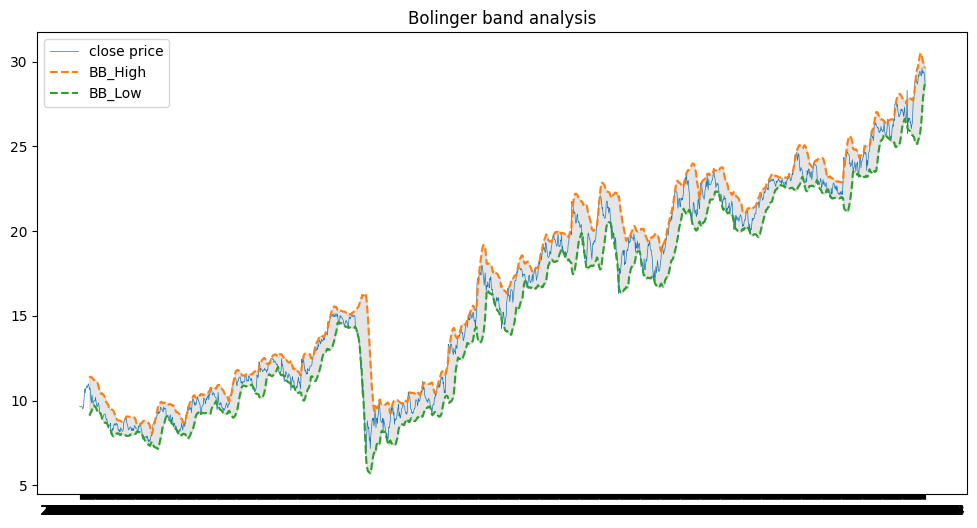

In [18]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(ICICI_data['Close'],window=20,window_dev=2)

ICICI_data['BB_High']=bb.bollinger_hband()
ICICI_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(ICICI_data['Close'],label='close price',linewidth=0.5)
plt.plot(ICICI_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(ICICI_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(ICICI_data.index,ICICI_data['BB_High'],
                 ICICI_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-18,4,IBN,29.46,29.550,29.400,29.41,5150982.0,28.9355,27.6500,29.969801,27.901199,63.938904
2024-07-19,3,IBN,29.35,29.610,29.345,29.36,4027158.0,29.0140,27.6946,29.915363,28.112637,61.860536
2024-07-22,2,IBN,29.36,29.570,29.220,29.55,3183272.0,29.0970,27.7430,29.777826,28.416174,61.981525
2024-07-23,1,IBN,29.11,29.285,28.940,29.05,3815082.0,29.1455,27.7902,29.666056,28.624944,57.104403
2024-07-24,0,IBN,28.62,28.950,28.570,28.94,8535547.0,29.1370,27.8268,29.685310,28.588690,48.970860


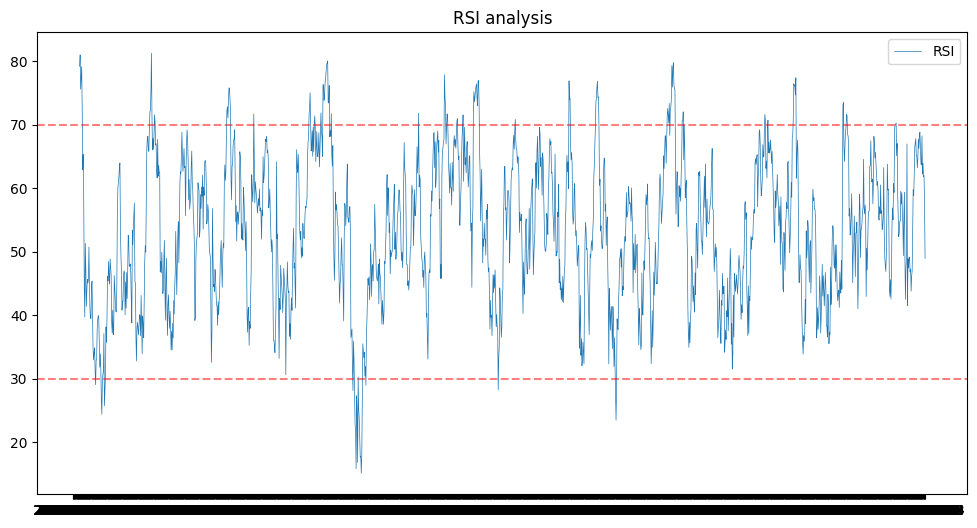

In [19]:
# relative strength index
ICICI_data['RSI'] = ta.momentum.rsi(ICICI_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(ICICI_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
ICICI_data.tail()

In [20]:
infy_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2018-01-02,1649,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07,NaN,NaN,NaN,NaN,NaN
2018-01-03,1648,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07,NaN,NaN,NaN,NaN,NaN
2018-01-04,1647,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07,NaN,NaN,NaN,NaN,NaN
2018-01-05,1646,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07,NaN,NaN,NaN,NaN,NaN
2018-01-08,1645,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07,NaN,NaN,NaN,NaN,NaN


In [21]:
tempData = infy_data['Close']
tempData.head()

Date
2018-01-02    7.24550
2018-01-03    7.18336
2018-01-04    7.13869
2018-01-05    7.27210
2018-01-08    7.33012
Name: Close, dtype: float64

In [22]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))

# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for = sarima_model.forecast()
print(value_for)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1650    21.891164
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [23]:
tempData.tail()

Date
2024-07-18    22.25
2024-07-19    21.68
2024-07-22    21.79
2024-07-23    22.08
2024-07-24    21.86
Name: Close, dtype: float64

In [24]:
# I wnat to forecast one year data

num_samples = 12

for i in range(num_samples):
  # lets create the forecaster
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))

  # train the model
  sarima_model = sarima_model.fit()

  # forecaste the value
  value_for = sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

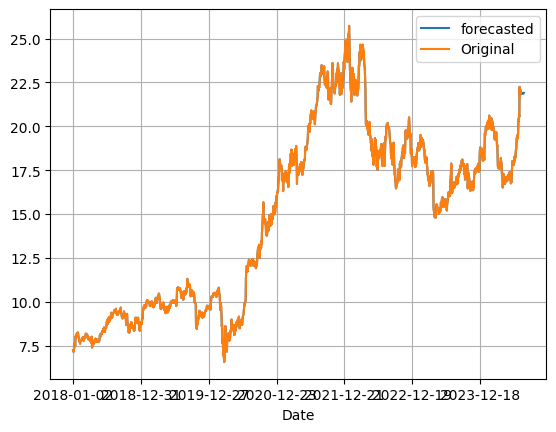

In [26]:


plt.figure(1)
tempData.plot(label='forecasted')

# Assuming infy_data['Close'] holds the original data
infy_data['Close'].plot(label='Original')

plt.legend()
plt.grid('on')